<a href="https://colab.research.google.com/github/abhishekhkumarsharma/Assignment_Solutions.ipynb/blob/main/DA_AG_018_Anomaly_TimeSeries_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Code: DA-AG-018  
Anomaly Detection & Time Series | Assignment**

**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.**

**Answer:**  

Anomaly Detection is the process of identifying data points or patterns that deviate from normal behavior. Such deviations may indicate fraud, system failure, or rare events.

- **Point anomaly:** A single unusual observation.  
  *Example:* Extremely high transaction amount in banking data.

- **Contextual anomaly:** An observation anomalous only under certain conditions.  
  *Example:* High power usage during midnight.

- **Collective anomaly:** A group of unusual observations.  
  *Example:* Continuous network traffic spikes during an attack.


**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.**

**Answer:**  

Isolation Forest isolates anomalies using random splits and works well on large datasets.  
DBSCAN detects anomalies based on data density and labels sparse points as noise.  
LOF identifies anomalies by comparing local density with neighbors.

Each method is suitable for different data distributions and anomaly patterns.


**Question 3: What are the key components of a Time Series? Explain each with one
example.**

**Answer:**  

Trend represents long-term movement.  
Seasonality represents repeating patterns.  
Cyclic represents irregular long-term fluctuations.  
Noise represents random variation.


**Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?**

**Answer:**  

A stationary time series has constant mean and variance over time.

Testing methods include ADF test.  
Transformations include differencing and log transformation.


**Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.**

**Answer:**  

AR uses past values.  
MA uses past errors.  
ARIMA combines AR and MA with differencing.  
SARIMA includes seasonality.  
SARIMAX includes external variables.


**Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components
(Include your Python code and output in the code box below.)**

**Answer:**

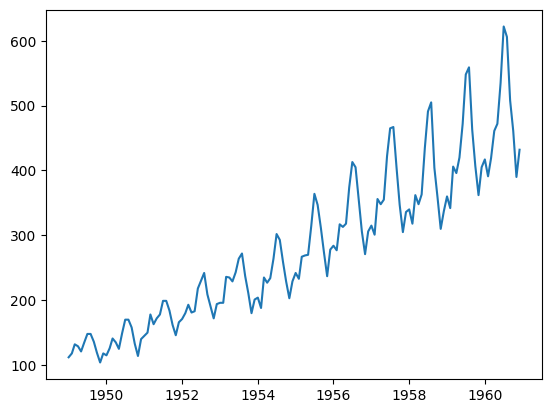

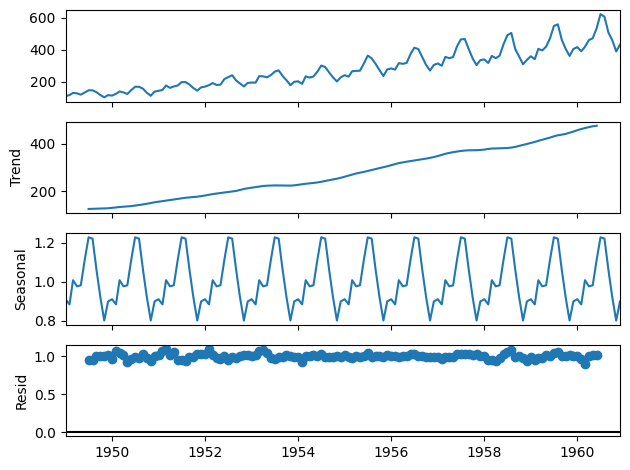

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
    parse_dates=['Month'],
    index_col='Month'
)

plt.plot(data)
plt.show()

seasonal_decompose(data, model='multiplicative').plot()
plt.show()

**Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.
(Include your Python code and output in the code box below.)**

**Answer:**

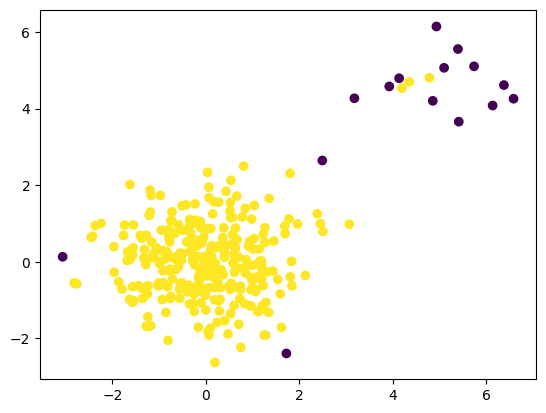

In [2]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randn(300, 2)
X[::20] += 5

iso = IsolationForest(contamination=0.05)
labels = iso.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

**Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.
(Include your Python code and output in the code box below.)**

**Answer:**

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


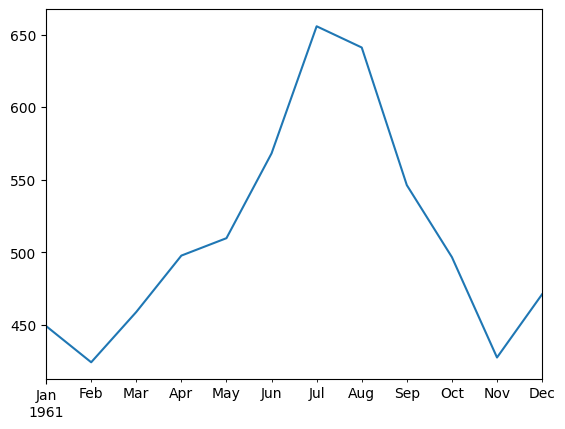

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit(disp=False)

forecast = result.forecast(12)
forecast.plot()
plt.show()

**Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.
(Include your Python code and output in the code box below.)**

**Answer:**

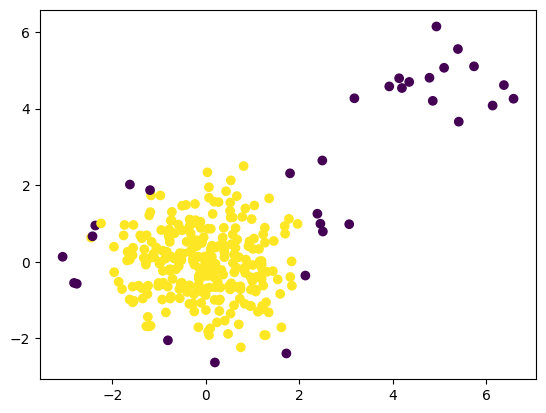

In [4]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
labels = lof.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

**Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?
(Include your Python code and output in the code box below.)**

**Answer:**  

Isolation Forest would be used for real-time anomaly detection due to speed. SARIMAX would be used for forecasting with weather data. Rolling validation would be applied to monitor performance and support operational decisions.


In [5]:
print("Streaming anomaly detection and forecasting pipeline demo")

Streaming anomaly detection and forecasting pipeline demo
